# Text mining : Analyse

### Libraries 

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import plotly.express as px 
import spacy
from spacy import displacy
from nltk.probability import FreqDist
import plotly.express as px
from wordcloud import ImageColorGenerator
from PIL import Image
from nltk.text import Text
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import LdaModel
import numpy as np
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importation des données 

#### Base de données "before"

In [108]:
df_before = pd.read_csv("data_chatgpt_before_nettoye.csv")


mots_before = []

for element in df_before['Tweet']:
    if isinstance(element, str):
        mots_before.extend(element.split())

# Liste de tous les mots de la base de données pré-traitée 
#print(mots_now) 


#### Base de données "now"

In [109]:
df_now = pd.read_csv("data_chatgpt_now_nettoye.csv")


mots_now = []

for element in df_now['Tweet']:
    if isinstance(element, str):
        mots_now.extend(element.split())

# Liste de tous les mots de la base de données pré-traitée 
#print(mots_now) 

## Statistiques decriptives 

### Nuage de mots

#### Création d'un générateur de couleurs (tons bleux foncés) 

In [110]:
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(240, 100%%, %d%%)" % np.random.randint(50, 70)

#### "before"

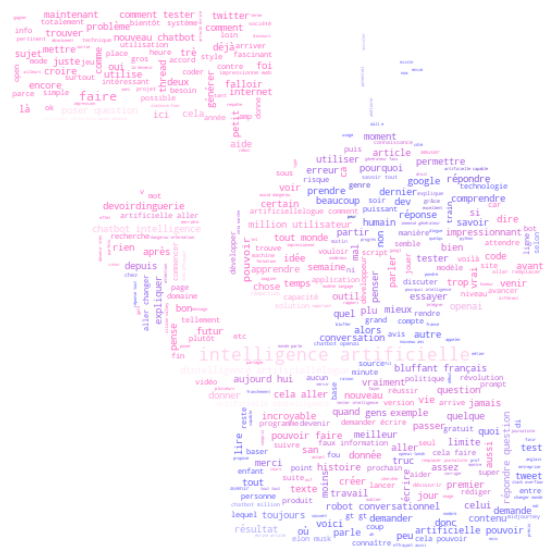

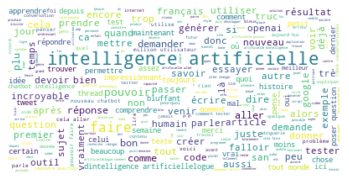

In [117]:
# chargement de l'image
mask = np.array(Image.open("robot.png"))
image_colors = ImageColorGenerator(mask)

# création du nuage de mots
wc = WordCloud(background_color="white", max_words=50000, mask=mask)
wc.generate(" ".join(mots_before))

# affichage du nuage de mots
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
ax.axis("off")
plt.savefig("Wordcloud_before_robot.png")
plt.show()

# Nuage de mots classique 
cloud_generator = WordCloud(background_color='white',
                            random_state=1)

wordcloud_image = WordCloud(background_color="white", max_words=20000)
wordcloud_image.generate(" ".join(mots_before))
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.savefig("Wordcloud_before.png")
plt.show()

#### "now"

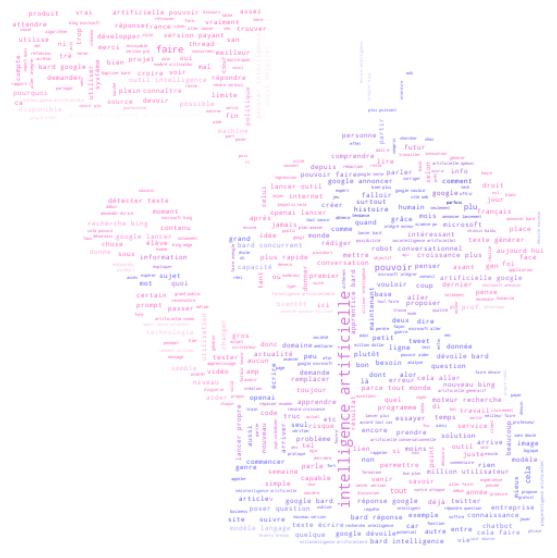

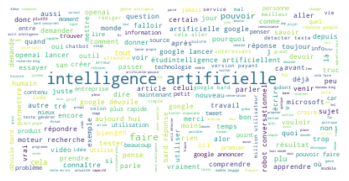

In [116]:
# chargement de l'image
mask = np.array(Image.open("robot.png"))
image_colors = ImageColorGenerator(mask)

# création du nuage de mots
wc = WordCloud(background_color="white", max_words=50000, mask=mask)
wc.generate(" ".join(mots_now))

# affichage du nuage de mots
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
ax.axis("off")
plt.savefig("Wordcloud_now_robot.png")
plt.show()

# Nuage de mots classique 
cloud_generator = WordCloud(background_color='white',
                            random_state=1)

wordcloud_image = WordCloud(background_color="white", max_words=20000)
wordcloud_image.generate(" ".join(mots_now))
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.savefig("Wordcloud_now.png")
plt.show()

### Graphique des dépendances 

On réalise le graphique des dépendances sur seulement 1000 mots => ça fait planter jupyter si on fait sur tous les mots 

#### "before"

In [105]:
# sur le tweet n°9
chaine = df_phrases_before["Tweet"][9]
doc = nlp(chaine)
options = {"compact": True, "color": "blue", "bg": "#FFFFFF", 'distance' : 130}
print(displacy.render(doc, style='dep', jupyter=True, options=options))

None


#### "now"

In [100]:
# sur le tweet n°8
chaine = df_phrases_now["Tweet"][8]
doc = nlp(chaine)
options = {"compact": True, "color": "blue", "bg": "#FFFFFF", 'distance' : 130}
print(displacy.render(doc, style='dep', jupyter=True, options=options))

None


### Analyse des fréquences 

#### "before"

In [19]:
# Comptage de la fréquence d'apparition des mots
word_counts = nltk.FreqDist(mots_before)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Afficher les 30 mots les plus fréquents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
fig.show()
fig.write_image("freq_before.png")

#fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

[('artificielle', 4157), ('intelligence', 4024), ('faire', 2327), ('google', 2162), ('plus', 1722), ('pouvoir', 1515), ('cela', 1338), ('aller', 1279), ('tout', 1255), ('bard', 1081)]
[('artificielle', 4157), ('intelligence', 4024), ('faire', 2327), ('google', 2162), ('plus', 1722), ('pouvoir', 1515), ('cela', 1338), ('aller', 1279), ('tout', 1255), ('bard', 1081), ('microsoft', 922), ('réponse', 902), ('si', 835), ('comme', 824), ('outil', 782), ('lancer', 774), ('openai', 769), ('utiliser', 747), ('nouveau', 733), ('recherche', 727), ('bing', 724), ('dire', 642), ('écrire', 638), ('voir', 620), ('comment', 596), ('question', 586), ('savoir', 586), ('bien', 574), ('texte', 536), ('devoir', 534)]


#### "now"

In [20]:
# Comptage de la fréquence d'apparition des mots
word_counts = nltk.FreqDist(mots_now)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Afficher les 30 mots les plus fréquents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
fig.show()
fig.write_image("freq_now.png")

#fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

[('artificielle', 1572), ('intelligence', 1548), ('faire', 1008), ('pouvoir', 728), ('tout', 724), ('cela', 653), ('aller', 646), ('plus', 546), ('question', 431), ('réponse', 425)]
[('artificielle', 1572), ('intelligence', 1548), ('faire', 1008), ('pouvoir', 728), ('tout', 724), ('cela', 653), ('aller', 646), ('plus', 546), ('question', 431), ('réponse', 425), ('écrire', 397), ('si', 386), ('demander', 366), ('openai', 355), ('nouveau', 355), ('comme', 337), ('bon', 292), ('voir', 284), ('savoir', 282), ('bien', 279), ('tester', 276), ('comment', 273), ('dire', 270), ('très', 268), ('aussi', 265), ('monde', 256), ('utiliser', 248), ('chatbot', 242), ('quand', 239), ('humain', 205)]


### Contexte d'apparition des mots 

#### "now"

In [9]:
# Importation des données 
df_phrases_before = pd.read_csv("data_chatgpt_before_phrase.csv")

phrases_before = []

for element in df_phrases_before['Tweet']:
    if isinstance(element, str):
        phrases_before.extend(element.split())

In [27]:
contexte = Text(phrases_before)

print("-----------------------------------")
print("Contexte d'apparition du mot Innovation")
print("-----------------------------------")
contexte.concordance("innovation") 

print("-----------------------------------")
print("Contexte d'apparition du mot Remplacer")
print("-----------------------------------")

contexte.concordance("remplacer")

-----------------------------------
Contexte d'apparition du mot Innovation
-----------------------------------
Displaying 25 of 41 matches:
ificielle ChatGPT en examen : une innovation qui questionne le système univers
Microsoft sur ChatGPT et Bing l ' innovation qui bouscule le monde de la Tech 
nt quand même important ." 🎙️ l ' innovation qui bouscule le monde de la Tech 
ificielle ChatGPT en examen : une innovation qui questionne le système univers
er dîner - débat 2023 avec hier ! Innovation , intelligence artificielle et ét
 imbriquer la régulation avec l ’ innovation ". invité de dans et : ne confiez
ution ou un robot à " bullshit "? Innovation – ChatGPT atteint 100 millions d 
’ est à dire la créativité ou l ’ innovation ." L ' dit oui à ! Pour Thierry B
e dis 😭 Dans la tête des gens l ' innovation , le truc qui déchire , c ' est c
teur général adjoint Stratégie et Innovation sera l ' invité de Michel Geyer s
 we ’ ll continue to be bold with innovation and responsible in our a

#### "now"

In [107]:
# Importation des données 
df_phrases_now = pd.read_csv("data_chatgpt_now_phrase.csv")

phrases_now = []

for element in df_phrases_now['Tweet']:
    if isinstance(element, str):
        phrases_now.extend(element.split())


In [106]:
contexte = Text(phrases_now)

print("-----------------------------------")
print("Contexte d'apparition du mot Innovation")
print("-----------------------------------")
contexte.concordance("innovation") 

print("-----------------------------------")
print("Contexte d'apparition du mot Remplacer")
print("-----------------------------------")

contexte.concordance("remplacer")

-----------------------------------
Contexte d'apparition du mot Innovation
-----------------------------------
Displaying 25 of 41 matches:
ificielle ChatGPT en examen : une innovation qui questionne le système univers
Microsoft sur ChatGPT et Bing l ' innovation qui bouscule le monde de la Tech 
nt quand même important ." 🎙️ l ' innovation qui bouscule le monde de la Tech 
ificielle ChatGPT en examen : une innovation qui questionne le système univers
er dîner - débat 2023 avec hier ! Innovation , intelligence artificielle et ét
 imbriquer la régulation avec l ’ innovation ". invité de dans et : ne confiez
ution ou un robot à " bullshit "? Innovation – ChatGPT atteint 100 millions d 
’ est à dire la créativité ou l ’ innovation ." L ' dit oui à ! Pour Thierry B
e dis 😭 Dans la tête des gens l ' innovation , le truc qui déchire , c ' est c
teur général adjoint Stratégie et Innovation sera l ' invité de Michel Geyer s
 we ’ ll continue to be bold with innovation and responsible in our a

## Analyse des thèmes 

#### Suppression des valeurs manquantes 

In [29]:
df_now = df_now.dropna()
df_now = df_now.reset_index(drop=True)

df_before = df_before.dropna()
df_before = df_before.reset_index(drop=True)

#### Création de la liste des tweets 

In [30]:
list_tweet_before = []
for i in range(len(df_before)) :
   list_tweet_before.append(df_before.iloc[i, 0].split())

list_tweet_now = []
for i in range(len(df_now)) :
   list_tweet_now.append(df_now.iloc[i, 0].split())

#### Dictionnaire pour le corpus 

In [35]:
dictionary_before = corpora.Dictionary(list_tweet_before)
dictionary_now = corpora.Dictionary(list_tweet_now)

corpus_before = [dictionary_before.doc2bow(text) for text in list_tweet_before]
corpus_now = [dictionary_now.doc2bow(text) for text in list_tweet_now]

#### Entraînement du modèle LDA

In [36]:
lda_model_before = LdaModel(corpus=corpus_before, id2word=dictionary_before, num_topics=3, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
lda_model_now = LdaModel(corpus=corpus_now, id2word=dictionary_now, num_topics=3, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

#### Affichage des thèmes générés par le modèle FDA

In [37]:
topics_before = lda_model_before.print_topics(num_words=7)
for topic in topics_before:
    print("Group before : ", topic)
topics_now = lda_model_now.print_topics(num_words=7)
for topic in topics_now:
    print("Group now : ", topic)

Group before :  (0, '0.021*"écrire" + 0.019*"code" + 0.018*"demander" + 0.014*"2" + 0.013*"demande" + 0.009*"train" + 0.008*"1"')
Group before :  (1, '0.068*"artificielle" + 0.065*"intelligence" + 0.028*"openai" + 0.028*"question" + 0.026*"nouveau" + 0.021*"réponse" + 0.014*"comment"')
Group before :  (2, '0.031*"faire" + 0.020*"tout" + 0.020*"pouvoir" + 0.016*"plus" + 0.015*"cela" + 0.015*"si" + 0.014*"aller"')
Group now :  (0, '0.109*"artificielle" + 0.105*"intelligence" + 0.026*"openai" + 0.022*"google" + 0.018*"lancer" + 0.013*"nouveau" + 0.011*"recherche"')
Group now :  (1, '0.030*"faire" + 0.017*"pouvoir" + 0.017*"outil" + 0.016*"cela" + 0.015*"tout" + 0.013*"aller" + 0.013*"texte"')
Group now :  (2, '0.018*"plus" + 0.011*"demander" + 0.011*"question" + 0.009*"bon" + 0.008*"temps" + 0.008*"3" + 0.008*"humain"')


## Analyse de sentiments 

#### "before"

In [61]:
df_phrases_before["Name"]="Tweet"

senti_list = []
for i in df_phrases_before["Tweet"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')  
        
df_phrases_before["Sentiment"]=senti_list
df_phrases_before
Number_sentiment_before= df_phrases_before.groupby(["Sentiment"])["Name"].count().reset_index().reset_index(drop=True)

In [62]:
fig = px.histogram(df_phrases_before, x="Sentiment",color="Sentiment")
fig.update_layout(
    title_text='Sentiment of reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()
fig.write_image("sentiment_bar_before.png")

In [69]:
fig = px.pie(Number_sentiment_before, values=Number_sentiment_before['Name'], names=Number_sentiment_before['Sentiment'], color_discrete_sequence=px.colors.sequential.Emrld
)
fig.show()
fig.write_image("sentiments_pie_before.png")

#### "now"

In [71]:
df_phrases_now["Name"]="Tweet"

senti_list = []
for i in df_phrases_now["Tweet"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')  
        
df_phrases_now["Sentiment"]=senti_list
print(df_phrases_now)
Number_sentiment_now= df_phrases_now.groupby(["Sentiment"])["Name"].count().reset_index().reset_index(drop=True)

                                                   Tweet   Name Sentiment
0                             Esse chatGPT é BIZARRO !!!  Tweet   Neutral
1      Voilà c ’ est reparti pour un tour : les mêmes...  Tweet  Positive
2      J ' suis meilleur que ChatGPT mais vous faites...  Tweet  Positive
3      C ' est ChatGPT qui a répondu là mdr c ' est p...  Tweet   Neutral
4      Google annonce qu ' il ne sanctionnera pas cha...  Tweet   Neutral
...                                                  ...    ...       ...
14996  je rajoute les mots A . I , ChatGpt et To The ...  Tweet   Neutral
14997  Télécharger chat gpt avant qu ’ il ne devienne...  Tweet   Neutral
14998  Le ChatGPT et le Talent Humain . FRANCE — EN S...  Tweet  Positive
14999  Dernières actus sur l ' intelligence artificie...  Tweet  Positive
15000         De choses et d ’ autres - Remplacement via  Tweet  Negative

[15001 rows x 3 columns]


In [67]:
fig = px.histogram(df_phrases_now, x="Sentiment",color="Sentiment")
fig.update_layout(
    title_text='Sentiment of reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()
fig.write_image("sentiments_bar_now.png")

In [70]:
fig = px.pie(Number_sentiment_now, values=Number_sentiment_now['Name'], names=Number_sentiment_now['Sentiment'], color_discrete_sequence=px.colors.sequential.Emrld
)
fig.show()
fig.write_image("sentiments_pie_now.png")